# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [194]:
# read the file
# your code here
DATA_FILENAME = 'data/dataset_1.csv'
df_data = pd.read_csv(DATA_FILENAME)

In [17]:
# split the data
# your code here
train_data, test_data = train_test_split(df_data, test_size=0.2, random_state=42)

In [115]:
# Test size is indeed 20% of total
# your code here 
display ("Test size is indeed " + str(float(test_data.size)/(test_data.size+train_data.size)*100) + "% of total")

'Test size is indeed 20.0% of total'

**1.2 Generate a scatter plot of the training data points**

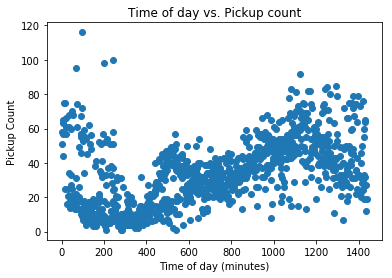

In [128]:
# Your code here
plt.scatter(train_data.TimeMin, train_data.PickupCount)
plt.xlabel("Time of day (minutes)")
plt.ylabel("Pickup Count")
plt.title("Time of day vs. Pickup count")
plt.show()

**1.3 Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

*your answer here*  
It does make intuitive sense. There is a lull in traffic in the early hours of the morning (around 3am to 6am). It picks up after 6am (when people wake up to go to work) and even more after 5pm (when people get off work / start going out). There are high pickup counts around midnight as well for when people are coming home after going out. Likely those highest pickup counts at night occurred on January 1st most people go out that night, but we do not have the date data.

<div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ... **

In [155]:
# your code here
k_values = [1, 10, 75, 250, 500, 750, 1000]
y_train = np.array(train_data.PickupCount) #PickupCount is response variable
X_train = np.array(train_data.TimeMin) #TimeMin is feature variable
X_train = X_train.reshape(X_train.shape[0], 1)

y_test = np.array(test_data.PickupCount) #PickupCount is response variable
X_test = np.array(test_data.TimeMin) #TimeMin is feature variable
X_test = X_test.reshape(X_test.shape[0], 1) #adds constant

def get_KNNmodels(X_data,y_data):
    reg_dict = {}
    for k in k_values:
        knnreg = KNeighborsRegressor(n_neighbors=k)
        knnreg.fit(X_data, y_data)
        reg_dict[k] = knnreg
    return reg_dict

train_KNN_dict = get_KNNmodels(X_train,y_train)

**2.2 For each $k$ on the training set, overlay a scatter plot ... **

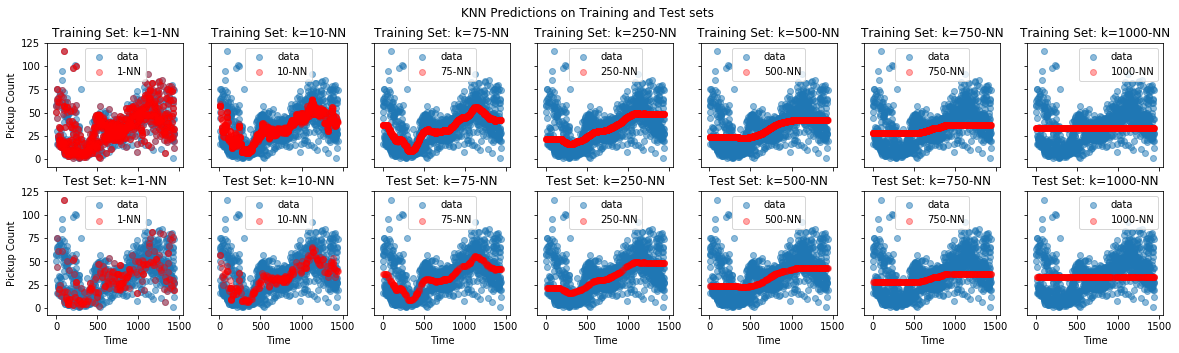

In [214]:
# your code here 
fig, axes = plt.subplots(2,7,sharex='col',sharey='row',figsize=(20,5)) #sharing axes reduces clutter
fig.suptitle("KNN Predictions on Training and Test sets")
s="Training Set"
feat_var = X_train #set feature variable
for ax in axes:
    ctr = 0 #counter 
    for a in ax:
        k = k_values[ctr]
        a.set(xlabel='Time', ylabel='Pickup Count')
        a.plot(df_data.TimeMin, df_data.PickupCount, 'o', label="data",alpha=0.5,zorder=0) #overlay scatter plot
        a.label_outer()
        predictions = train_KNN_dict[k].predict(feat_var)
        a.scatter(feat_var,predictions, color='r',alpha=0.35, label="{}-NN".format(k),zorder=1)
        a.set_title(s+": k=" + str(k)+"-NN")
        a.legend()
        ctr+=1
    s="Test Set"
    feat_var = X_test

**2.3 Report the $R^2$ score for the fitted models ... **

In [199]:
# your code here
def get_scores(KNN_dict):
    train_scores = []
    test_scores = []
    for k in KNN_dict.values():
        train_scores.append(k.score(X_train,y_train))
        test_scores.append(k.score(X_test,y_test))
    return [train_scores,test_scores]

from tabulate import tabulate
score_dict = {"K Value": k_values, "Training R-Squared Score":get_scores(train_KNN_dict)[0], 
                "Test R-Squared Score":get_scores(train_KNN_dict)[1]}
print (tabulate(score_dict, headers="keys"))

  K Value    Training R-Squared Score    Test R-Squared Score
---------  --------------------------  ----------------------
        1                    0.712336             -0.418932
       10                    0.509825              0.272068
       75                    0.445392              0.39031
      250                    0.355314              0.340341
      500                    0.290327              0.270321
      750                    0.179434              0.164909
     1000                    0                    -0.00038433


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

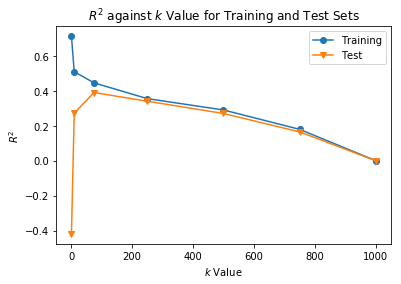

In [205]:
# your code here
plt.plot(score_dict["K Value"],score_dict["Training R-Squared Score"],label="Training",marker='o')
plt.plot(score_dict["K Value"],score_dict["Test R-Squared Score"],label="Test",marker='v')
plt.xlabel("$k$ Value")
plt.ylabel("$R^2$")
plt.legend()
plt.title("$R^2$ against $k$ Value for Training and Test Sets")
plt.show()

**2.5 Discuss the results**

**1.** The regression at $k=n$ simply gives us back the average of the response variables because the regression predicts based on the entire data set rather than truly close neighbors. As we can see, on the Training set, as the $k$ increases towards $n$, the $R^2$ tends to 0, which means it is as effective a model as simply computing the average.  
**2.** An $R^2$ score of 0 means that the accuracy of the prediction from the model is as accurate as a model which just returns the average.  
**3.** Yes on the Test set, the $R^2$ for $k=1$ (and technically $k=1000$, but pretty negligible) is negative. This means that for that value of $k$, the $k$-NN regression prediction is less accurate than a model which simply returns the average.  
**4.** Yes, the $R^2$ of the Training set appears to monotonically decrease as $k$ increases, while for the Test set, the $R^2$ shoots up from 0, and then starts decreasing after $k=75$ Naturally, the predictions using the Training data are more accurate, especially at low values of $k$ because the model was built from the Training data. We see that on low values of $k$ for the Test data, we get an abysmal $R^2$ score because a low $k=1$ creates a model that essentially reports the Training set values, which are going to be different from the Test data (unlike the Training set data, which it was the same, and hence performed well). As $k$ increases, they exhibit the same trend, however it could be said that the Training performs marginally better at these higher $k$ values.  
**5.** While initially a higher value of $k$ increases the $R^2$ value for just the test data predictions, ultimately both the training and test data predictions converge towards a $R^2$ value of 0 as $k$ increases. See 2.4 plot for exact trends.  
**6.** The highest $R^2$ for the Training set is with $k=1$ which gives an $R^2 =  0.712336$. The highest $R^2$ for the Test set is with $k=75$ and gives an $R^2 = 0.39031$.

<div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ... **

In [213]:
# your code here
OLSModel = OLS(y_train,X_train)

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ... **

NameError: name 'x_train' is not defined

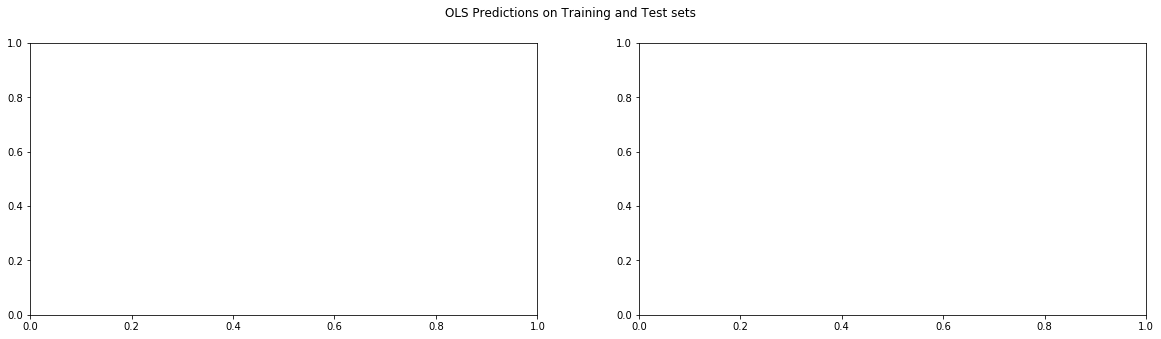

In [225]:
# your code here
fig, axes = plt.subplots(1,2,figsize=(20,5))
fig.suptitle("OLS Predictions on Training and Test sets")
s="Training Set"
feat_var = sm.add_constant(x_train) #set feature variable
for a in axes:
    a.set(xlabel='Time', ylabel='Pickup Count')
    a.plot(df_data.TimeMin, df_data.PickupCount, 'o', label="data",alpha=0.5,zorder=0) #overlay scatter plot
    a.label_outer()
    results = OLSModel.fit()
    a.scatter(feat_var,results, color='r',alpha=0.35, label="{}-NN".format(k),zorder=1)
    a.set_title(s+": k=" + str(k)+"-NN")
    a.legend()
    s="Test Set"
    feat_var = X_test

In [18]:
# your code here


In [19]:
# your code here 


**3.3 Report the $R^2$ score for the fitted model on both the training and test sets. **

In [20]:
# your code here


**3.4 Report the slope and intercept values for the fitted linear model.  **

In [21]:
## show summary
# your code here


In [22]:
# your code here


**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [23]:
# your code here


**3.6 Create a scatter plot of the residuals**

In [24]:
# your code here


In [25]:
# your code here


**3.7 Discuss the results:**

*your answer here*


<div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


<div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?



**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order of 'severity').  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step?
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**4.8**. Run your algorithm in 4.7 on the training set data.  
1. What outliers does it identify?
2. How do those outliers compare to the outliers you found in 4.4?
3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data? ** 

In [26]:
# read the data
# your code here


In [27]:
# your code here


In [28]:
# your code here


In [29]:
# your code here


In [30]:
# scatter plot
# your code here


*your answer here*


**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ... **

In [31]:
# your code here


**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

*your answer here*


**4.4 CS109 hack ... **

In [32]:
def find_outliers_simple(dataset_x, dataset_y):
    # your code here


In [33]:
# get outliers
# your code here


In [34]:
simple_outliers_y

In [35]:
# calculate outlier model
# your code here


**4.5 Create a figure with two subplots: the first is a scatterplot ... **

In [59]:
# plot 
# your code here


*your answer here*


**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [60]:
# your code here


**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers. **

In [62]:
# your code here


**4.8 Run your algorithm in 4.7 on the training set data **

In [63]:
# your code here


In [64]:
# your code here


In [65]:
# your code here


In [66]:
# your code here


*your answer here*
